In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
req = [1, 2, 3, 9, 10, 11]
df = pd.read_excel(r'E:\\Samartha_Internship_Code_Files\\Anusha_Girish_Internship\\Datasets\\sample_data.xlsx', usecols = req)
df

,WellCode,DistrictCode,TalukaCode,DistrictName,TalukaName,VillageName
0,50111,164,1,Bagalkot,Badami,NaN
1,50103,164,1,Bagalkot,Badami,ALLUR
2,50104,164,1,Bagalkot,Badami,ADAGAL
3,50107,164,1,Bagalkot,Badami,AGASARKOPPA
4,50109,164,1,Bagalkot,Badami,ALADKATTI
...,...,...,...,...,...,...
613,40513,169,35,Bidar,Homnabad,NaN
614,40506,169,35,Bidar,Homnabad,NaN
615,40503,169,35,Bidar,Homnabad,NaN
616,40511,169,35,Bidar,Homnabad,NaN


In [3]:
req1 = [2, 3, 4,5]
df1 = pd.read_excel(r'E:\\Samartha_Internship_Code_Files\\Anusha_Girish_Internship\\Datasets\\sample_data.xlsx', sheet_name ='txn_well_reading', usecols = req1 )

In [4]:
df1

,WellCode,Reading_Year,Reading_Month,Reading_WaterLevel
0,021006A,1997,11,0.80
1,021006A,1997,12,0.70
2,021006A,1998,1,0.75
3,021006A,1998,2,0.75
4,021006A,1998,3,0.90
...,...,...,...,...
48877,20206,2017,8,29.30
48878,20206,2017,9,29.15
48879,20206,2017,10,26.10
48880,20206,2017,11,26.05


In [5]:
df2 = pd.merge(df, df1, on = 'WellCode')
df2

,WellCode,DistrictCode,TalukaCode,DistrictName,TalukaName,VillageName,Reading_Year,Reading_Month,Reading_WaterLevel
0,50103,164,1,Bagalkot,Badami,ALLUR,2018,1,44.10
1,50103,164,1,Bagalkot,Badami,ALLUR,2018,2,48.50
2,50103,164,1,Bagalkot,Badami,ALLUR,2018,3,48.30
3,50103,164,1,Bagalkot,Badami,ALLUR,2018,4,48.80
4,50103,164,1,Bagalkot,Badami,ALLUR,2018,5,49.25
...,...,...,...,...,...,...,...,...,...
79444,40502,169,35,Bidar,Homnabad,NaN,2017,8,7.15
79445,40502,169,35,Bidar,Homnabad,NaN,2017,9,6.50
79446,40502,169,35,Bidar,Homnabad,NaN,2017,10,7.00
79447,40502,169,35,Bidar,Homnabad,NaN,2017,11,7.45


In [6]:
gk = df2.groupby(['DistrictName','TalukaName','Reading_Year','Reading_Month'])
#gk["Reading_WaterLevel"].mean()
a = gk.groups

df4 = pd.DataFrame(columns = ['District', 'Taluk', 'Reading_Year','Reading_Month', 'Average_Reading'])
for i, k in a.items():
    k = gk.get_group(i)["Reading_WaterLevel"].mean()
    i = list(i)
    i.append(k)
    #print(i)
    df4.loc[len(df4.index)] = [i[0], i[1], i[2], i[3], -(i[4])]
#df4 = df4["Average_Reading"].mul(-1)
df4
    
#for i, k in a.items():
 #  print(i, "=", gk.get_group(i)["Reading_WaterLevel"].mean())

,District,Taluk,Reading_Year,Reading_Month,Average_Reading
0,Bagalkot,Badami,2012,1,-9.980000
1,Bagalkot,Badami,2012,2,-12.340000
2,Bagalkot,Badami,2012,3,-13.650000
3,Bagalkot,Badami,2012,4,-14.060000
4,Bagalkot,Badami,2012,5,-17.860000
...,...,...,...,...,...
6862,Bidar,Homnabad,2018,6,-16.540909
6863,Bidar,Homnabad,2018,7,-16.034545
6864,Bidar,Homnabad,2018,8,-15.813636
6865,Bidar,Homnabad,2018,9,-15.822222


In [19]:
df4.to_excel('df4.xlsx')

District:Bagalkot
Taluk :Badami
Month Number : 7


<Figure size 432x288 with 0 Axes>

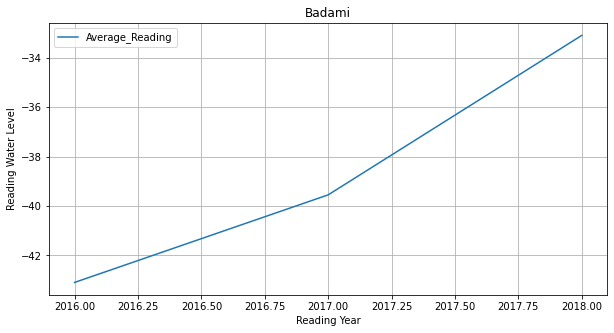

In [8]:
#monthly analysis
d = input("District:")
t = input("Taluk :")
n = int(input("Month Number : "))
po = df4["Taluk"] == t
poi = df4["Reading_Month"] == n
df5 = df4[po & poi]

fig = plt.figure()
df5[:].plot(x = 'Reading_Year', y = 'Average_Reading', figsize = (10,5), grid = True)
plt.title(t)
plt.xlabel('Reading Year')
plt.ylabel('Reading Water Level')
plt.savefig('saved_figure.png')

District:Bidar
Taluk :Homnabad
Year Number : 2012


<Figure size 432x288 with 0 Axes>

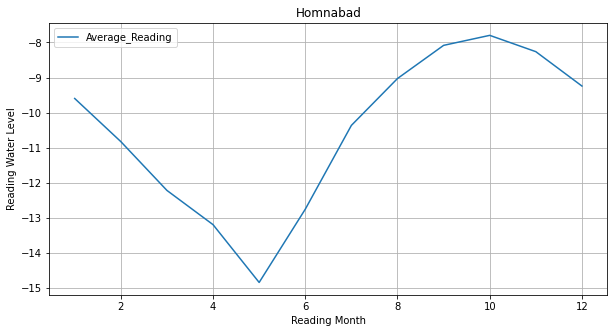

In [9]:
#yearly analysis
d = input("District:")
t = input("Taluk :")
n = int(input("Year Number : "))
po = df4["Taluk"] == t
poi = df4["Reading_Year"] == n
df5 = df4[po & poi]

fig = plt.figure()
df5[:].plot(x = 'Reading_Month', y = 'Average_Reading', figsize = (10,5), grid = True)
plt.title(t)
plt.xlabel('Reading Month')
plt.ylabel('Reading Water Level')
plt.savefig('saved_figure1.png')

In [10]:
po = df4["Taluk"] == "Badami"
poi = df4["Reading_Year"] == 2012
df4[po & poi]

,District,Taluk,Reading_Year,Reading_Month,Average_Reading
0,Bagalkot,Badami,2012,1,-9.98
1,Bagalkot,Badami,2012,2,-12.34
2,Bagalkot,Badami,2012,3,-13.65
3,Bagalkot,Badami,2012,4,-14.06
4,Bagalkot,Badami,2012,5,-17.86
5,Bagalkot,Badami,2012,6,-19.52
6,Bagalkot,Badami,2012,8,-19.45
7,Bagalkot,Badami,2012,9,-18.86
8,Bagalkot,Badami,2012,11,-18.51
9,Bagalkot,Badami,2012,12,-18.95


In [11]:
kl = df4["Taluk"] == "Badami"
list(df4[kl]["Reading_Year"].unique())

[2012, 2013, 2015, 2016, 2017, 2018]

In [12]:
"""df8 = df4.groupby(['Taluk','Reading_Year'])
df7 = pd.DataFrame(columns = ['District', 'Taluk', 'Year' ,'Slope'])
a = list(df8["Taluk"].unique())
for i in a:
    kl = df8["Taluk"] == i
    b = list(df8[kl]["Reading_Year"].unique())
    for k2 in b:
        x1 = int(df8[kl]["Reading_Month"].head(1))
        x2 = int(df8[kl]["Reading_Month"].tail(1))
        y1 = float(df8[kl]["Average_Reading"].head(1))
        y2 = float(df8[kl]["Average_Reading"].tail(1))
        di = list(df8[kl]["District"].head(1))
        #print(type(x1))
        #ye = list(df4[df4["Taluk"] == kl]["Reading_Year"].head(1))
        if((x2-x1)!= 0):
            slope = (y2-y1)/(x2-x1)
        #print(slope)
        df7.loc[len(df7.index)] = [di[0], i, k2, slope]
df7"""

'df8 = df4.groupby([\'Taluk\',\'Reading_Year\'])\ndf7 = pd.DataFrame(columns = [\'District\', \'Taluk\', \'Year\' ,\'Slope\'])\na = list(df8["Taluk"].unique())\nfor i in a:\n    kl = df8["Taluk"] == i\n    b = list(df8[kl]["Reading_Year"].unique())\n    for k2 in b:\n        x1 = int(df8[kl]["Reading_Month"].head(1))\n        x2 = int(df8[kl]["Reading_Month"].tail(1))\n        y1 = float(df8[kl]["Average_Reading"].head(1))\n        y2 = float(df8[kl]["Average_Reading"].tail(1))\n        di = list(df8[kl]["District"].head(1))\n        #print(type(x1))\n        #ye = list(df4[df4["Taluk"] == kl]["Reading_Year"].head(1))\n        if((x2-x1)!= 0):\n            slope = (y2-y1)/(x2-x1)\n        #print(slope)\n        df7.loc[len(df7.index)] = [di[0], i, k2, slope]\ndf7'

In [13]:
gk1 = df4.groupby(['District','Taluk','Reading_Year'])
#gk["Reading_WaterLevel"].mean()
a1 = gk1.groups

df3 = pd.DataFrame(columns = ['District', 'Taluk', 'Reading_Year', 'Average_Reading'])
for i, k in a1.items():
    k = gk1.get_group(i)["Average_Reading"].mean()
    i = list(i)
    i.append(k)
    #print(i)
    df3.loc[len(df3.index)] = [i[0], i[1], i[2], i[3]]
df3


,District,Taluk,Reading_Year,Average_Reading
0,Bagalkot,Badami,2012,-16.318000
1,Bagalkot,Badami,2013,-17.640000
2,Bagalkot,Badami,2015,-25.995000
3,Bagalkot,Badami,2016,-36.104545
4,Bagalkot,Badami,2017,-36.277273
...,...,...,...,...
580,Bidar,Homnabad,2014,-10.176944
581,Bidar,Homnabad,2015,-13.882444
582,Bidar,Homnabad,2016,-13.648421
583,Bidar,Homnabad,2017,-13.165139


In [14]:
df3.to_excel('df3.xlsx')

District:Bidar
Taluk :Gokak


<Figure size 432x288 with 0 Axes>

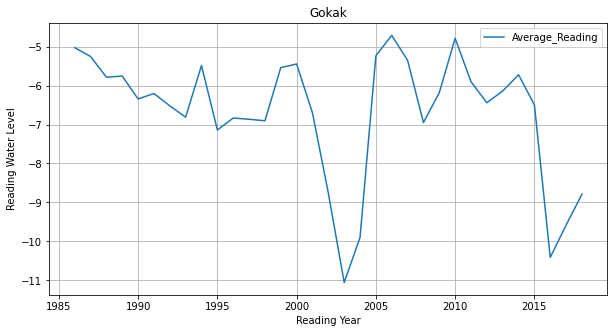

In [15]:
#all time graph
d = input("District:")
t = input("Taluk :")
#n = int(input("Year Number : "))
po = df3["Taluk"] == t
#poi = df3["Reading_Year"] == nli
df5 = df3[po]

fig = plt.figure()
df5[:].plot(x = 'Reading_Year', y = 'Average_Reading', figsize = (10,5), grid = True)
plt.title(t)
plt.xlabel('Reading Year')
plt.ylabel('Reading Water Level')
plt.savefig('saved.figure2.png')

In [16]:
df6 = pd.DataFrame(columns = ['District', 'Taluk', 'Slope'])
g = list(df3["Taluk"].unique())
for i in g:
    x1 = int(df3[df3["Taluk"] == i]["Reading_Year"].head(1))
    x2 = int(df3[df3["Taluk"] == i]["Reading_Year"].tail(1))
    y1 = float(df3[df3["Taluk"] == i]["Average_Reading"].head(1))
    y2 = float(df3[df3["Taluk"] == i]["Average_Reading"].tail(1))
    di = list(df3[df3["Taluk"] == i]["District"].head(1))
    if((x2-x1) != 0):
        slope = (y2-y1)/(x2-x1)
    df6.loc[len(df6.index)] = [di[0], i, slope]
df6

,District,Taluk,Slope
0,Bagalkot,Badami,-2.656071
1,Bagalkot,Bagalkot,-2.656071
2,Bagalkot,Bilgi,-2.656071
3,Bagalkot,Hungund,-1.544606
4,Bagalkot,Jamkhandi,-1.544606
5,Bagalkot,Mudhol,-1.544606
6,Ballari,Ballari,0.193171
7,Ballari,H B Halli,0.551290
8,Ballari,H Hadagalli,0.551290
9,Ballari,Hospet,-0.085490


In [17]:
a = df6["Slope"].min()
b = df6["Slope"].max()
df6[df6["Slope"] == a]
print("The most deprecating water level district = ", df6[df6["Slope"] == a]["District"].unique()[0])
x = df6[df6["Slope"] ==a ]["Taluk"].unique()
print("The most deprecating water level taluk = ", x[0],"," ,x[1],"," ,x[2])

The most deprecating water level district =  Bagalkot
The most deprecating water level taluk =  Badami , Bagalkot , Bilgi


In [18]:
df6[df6["Slope"] == b]
print("The most efficient water level district = ", df6[df6["Slope"] == b]["District"].unique()[0])
x = df6[df6["Slope"] == b]["Taluk"].unique()
print("The most efficient water level taluk = ", x[0],"," ,x[1])

The most efficient water level district =  Ballari
The most efficient water level taluk =  H B Halli , H Hadagalli
